PS 4: Marks 400. Student Attendance Dashboard for Decision Making. You will be given Google Sheet with different sheet holding data of different classes. Create a dashboard showing summary of what's happening across different classes. Which students needs attention for missing session? Which students are unsatisfied? Which students are very satisfied? <Date> Column shows attendance. R-<Date> Column shows rating by the candidate. Extra marks for identifying more useful insights. Missing values of Type column can be treated as STUDENT. This data gets updated daily basis. Latest data gets injected in early columns. Your code shouldn't need any changes to deal with latest data.

1. Number of total attended classes
2. Ratings for missed students vs attended students
3. Lineplot of ratings
4. 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheet_id = '1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8'
class_1 = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")
class_1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,6,Missed,7,Missed,9,Missed,9,...,Missed,7,Missed,5,Missed,8,Missed,9,Missed,10
1,2,NaN,Missed,5,Missed,7,Missed,5,Attended,5,...,Attended,6,Attended,5,Missed,8,Attended,5,Missed,5
2,3,STUDENT,Missed,7,Missed,5,Missed,8,Missed,9,...,Attended,9,Missed,10,Missed,8,Attended,9,Attended,5
3,4,STUDENT,Missed,6,Missed,8,Attended,9,Missed,5,...,Missed,5,Attended,8,Attended,8,Attended,8,Attended,5
4,5,WORKING,Missed,10,Missed,10,Missed,8,Missed,8,...,Missed,7,Missed,7,Missed,9,Missed,10,Missed,10


In [3]:
class_1.isnull().sum()

Student Roll Num     0
Type                25
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             1
R-7-01-21            0
06-01-21             1
R-6-01-21            0
05-01-21             1
R-5-01-21            0
04-01-21             1
R-4-01-21            0
03-01-21             1
R-3-01-21            0
02-01-21             1
R-02-01-21           0
01-01-21             1
R-01-01-21           0
dtype: int64

In [4]:
#Lets fill in the missing values first!

In [30]:
from sklearn.impute import SimpleImputer
def clean_df(df):
    df['Type'].fillna('STUDENT', inplace = True)
    
    for i in df.columns:
        if df[i].isnull().sum() == len(df):
            del df[i]
    
    imputer = SimpleImputer(strategy = 'most_frequent')
    df_return = imputer.fit_transform(df)
    return pd.DataFrame(df_return, columns = df.columns)
    
class_1_clean = clean_df(class_1)

## Class 2 Dataset and Preprocessing

In [24]:
sheet_id = '1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8'
class_2 = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid=1548342679")
class_2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,Unnamed: 18,Unnamed: 19,01-01-21,R-01-01-21
0,1,NaN,Attended,7,Attended,9,Attended,10,Attended,8,...,Attended,6,Attended,7,Missed,9,NaN,NaN,NaN,NaN
1,2,NaN,Attended,9,Attended,6,Attended,8,Attended,7,...,Attended,7,Attended,7,Attended,7,NaN,NaN,NaN,NaN
2,3,STUDENT,Missed,6,Missed,7,Missed,6,Missed,6,...,Missed,5,Missed,7,Missed,5,NaN,NaN,NaN,NaN
3,4,NaN,Attended,9,Attended,10,Attended,5,Attended,6,...,Missed,6,Attended,10,Attended,9,NaN,NaN,NaN,NaN
4,5,WORKING,Attended,5,Attended,7,Attended,7,Missed,10,...,Missed,9,Missed,5,Missed,9,NaN,NaN,NaN,NaN


In [31]:
class_2_clean = clean_df(class_2)

In [32]:
class1 = class_1_clean[:]
class2 = class_2_clean[:]

### Questions to answer!

1. Which students need attention for missing classes?
2. Which students are not satisfied with their classes?
3. Which students are very satisfied with their classes?
4. Are students missing more classes or are working people missing classes? Students should not be missing classes at all!
5. How is the average rating trending for the different classes?
7. What is the rating trend for students who are missing classes vs students who are attending classes?


In [57]:
class1.tail()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
52,53,STUDENT,Missed,8,Missed,5,Attended,9,Missed,9,...,Missed,9,Attended,5,Attended,5,Attended,5,Attended,7
53,54,STUDENT,Attended,8,Missed,7,Attended,5,Attended,8,...,Attended,9,Attended,6,Attended,10,Attended,5,Attended,5
54,55,WORKING,Missed,9,Missed,8,Missed,5,Missed,8,...,Attended,7,Attended,10,Missed,8,Attended,8,Missed,6
55,56,STUDENT,Attended,6,Attended,5,Attended,5,Missed,5,...,Attended,7,Attended,5,Attended,5,Attended,9,Attended,10
56,57,STUDENT,Attended,5,Attended,7,Attended,6,Attended,10,...,Missed,6,Attended,6,Attended,8,Attended,10,Attended,7


In [122]:
def student_info_gen(df):

    ratings_features = list(range(3,len(df.columns)+1,2))

    class_students = pd.DataFrame({'student_roll_num':df['Student Roll Num'],
                                   'student_type':df['Type'],
                                   'classes_attended':df[df == 'Attended'].count(axis = 1),
                                  'num_of_classes':df[(df == 'Missed')|(df == 'Attended')].count(axis = 1),
                                   'average_rating':df.iloc[:,ratings_features].mean(axis = 1)}).sort_values(by = 'classes_attended')

    class_students['attendance_perc'] = (class_students['classes_attended']/class_students['num_of_classes'])*100
    return class_students

In [123]:
class1_students = student_info_gen(class1)
class2_students = student_info_gen(class2)

## Which students need are missing the most classes?

We can see the students' roll number who have attended fewer classes!

### For Batch 1

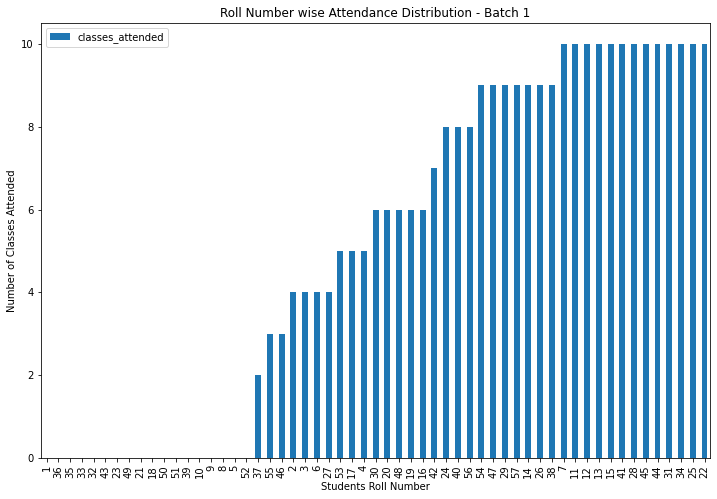

In [124]:
class1_students.plot(x = 'student_roll_num', y = 'classes_attended', kind = 'bar', figsize = (12,8))
plt.xlabel('Students Roll Number')
plt.ylabel('Number of Classes Attended')
plt.title('Roll Number wise Attendance Distribution - Batch 1')
plt.show()

### For Batch 2

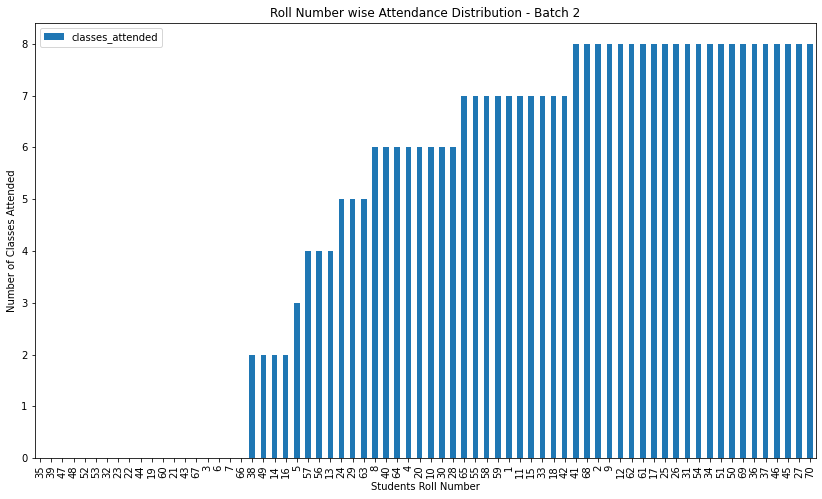

In [125]:
class2_students.plot(x = 'student_roll_num', y = 'classes_attended', kind = 'bar', figsize = (14,8))
plt.xlabel('Students Roll Number')
plt.ylabel('Number of Classes Attended')
plt.title('Roll Number wise Attendance Distribution - Batch 2')
plt.show()

We have created a dataframe which contains the attendance of each students upto now! Lets go ahead and add an attendance percentage column, we will do all this using a function so that it can be automated for both the batches!

We will also do this for ratings!

In [126]:
#We can easily tell who are the students who need attention for missed classes from this!


# Which students are most satisfied and least satisfied?
We have plotted the average rating of the students through the ten days!

### For Batch 1

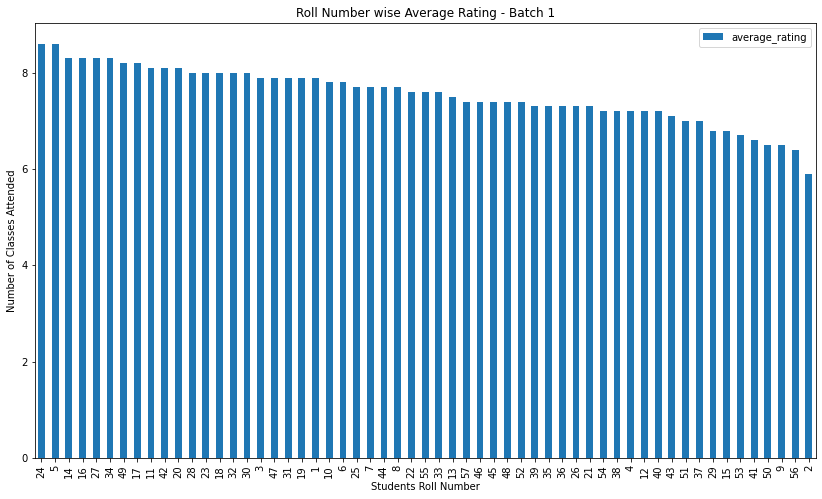

In [127]:
class1_students.sort_values(by = 'average_rating',ascending = False).plot(x = 'student_roll_num', y = 'average_rating', kind = 'bar', figsize = (14,8))
plt.xlabel('Students Roll Number')
plt.ylabel('Number of Classes Attended')
plt.title('Roll Number wise Average Rating - Batch 1')
plt.show()

### For Batch 2

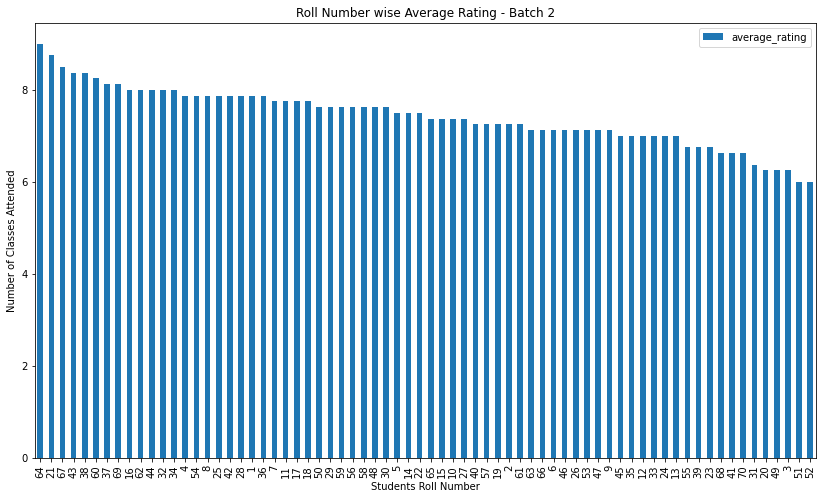

In [128]:
class2_students.sort_values(by = 'average_rating',ascending = False).plot(x = 'student_roll_num', y = 'average_rating', kind = 'bar', figsize = (14,8))
plt.xlabel('Students Roll Number')
plt.ylabel('Number of Classes Attended')
plt.title('Roll Number wise Average Rating - Batch 2')
plt.show()

## Are students missing more classes or are working people missing more classes?

### For Batch 1

In [133]:
class1_students.groupby('student_type', as_index = False).mean()

,student_type,classes_attended,num_of_classes,average_rating,attendance_perc
0,DROPOUT,0.000000,10.0,7.400000,0.000000
1,IGNORE,0.000000,10.0,6.500000,0.000000
2,STUDENT,5.555556,10.0,7.533333,55.555556
3,WORKING,4.777778,10.0,7.855556,47.777778


In [155]:
def plot_attendance_by_type(df, name):
    df.groupby('student_type', as_index = False).mean().plot(x = 'student_type', y = 'attendance_perc', kind = 'bar')
    plt.xlabel('Type Of Student')
    plt.ylabel('Attendance Percentage')
    plt.title('Student Type vs Attendace Percentage {}'.format(name))
    plt.xticks(rotation = 45)
    plt.show()

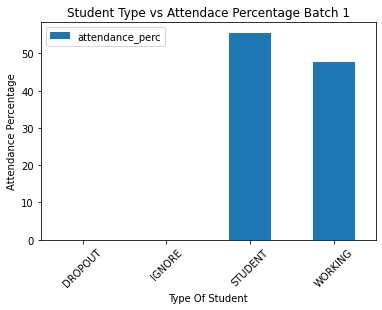

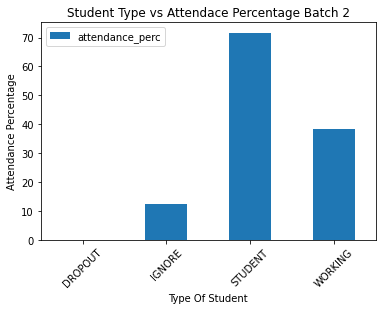

In [156]:
plot_attendance_by_type(class1_students, 'Batch 1')
plot_attendance_by_type(class2_students, 'Batch 2')

## How is the average rating trending for different batches?

In [186]:
def date_ratings(df):
    df_mod = pd.DataFrame(df.drop('Student Roll Num', axis = 1).mean(axis = 0)).reset_index(drop = False)
    df_mod.columns = ['date','average_rating']
    df_mod['date'] = df_mod['date'].str.replace('R-','')
    df_mod['date'] = pd.to_datetime(df_mod['date'],dayfirst = True)
    return df_mod

In [193]:
class1_dates = date_ratings(class1)
class2_dates = date_ratings(class2)

<ipython-input-186-8d0e8fa25499>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mod = pd.DataFrame(df.drop('Student Roll Num', axis = 1).mean(axis = 0)).reset_index(drop = False)


In [192]:
def plot_rating_over_time(df, name):
    df.plot(x = 'date', y = 'average_rating', figsize = (10,6))
    plt.xlabel('Date')
    plt.ylabel('Average Rating')
    plt.title('Average Rating Trend - {}'.format(name))
    plt.yticks([1,2,3,4,5,6,7,8,9,10])
    plt.show()

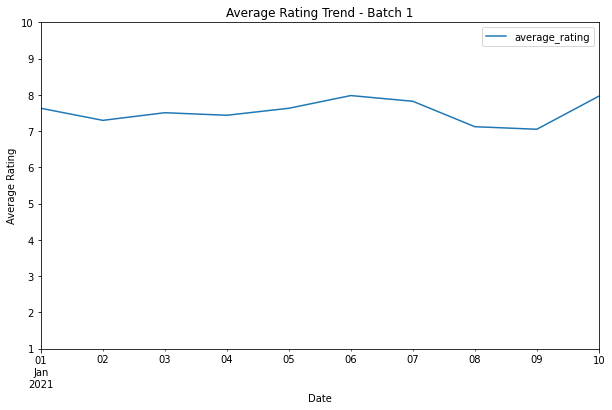

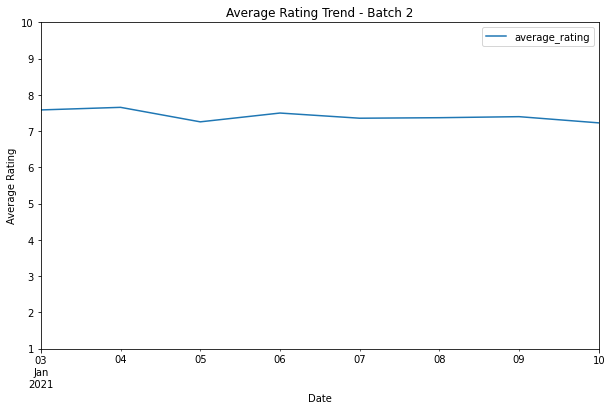

In [194]:
plot_rating_over_time(class1_dates, 'Batch 1')
plot_rating_over_time(class2_dates, 'Batch 2')

### What is the rating trend for students who are missing classes vs students who are attending classes?

### For Batch 1

In [223]:
def date_ratings_missers(df_students, full_df):
    students_missing_class = df_students[:15]
    df = students_missing_class.merge(full_df, left_on = 'student_roll_num',right_on = 'Student Roll Num', how = 'left')
    df_mod = pd.DataFrame(df.drop(['student_roll_num','num_of_classes','classes_attended','average_rating','attendance_perc','Student Roll Num'], axis = 1).mean(axis = 0)).reset_index(drop = False)
    df_mod.columns = ['date','average_rating']
    df_mod['date'] = df_mod['date'].str.replace('R-','')
    df_mod['date'] = pd.to_datetime(df_mod['date'],dayfirst = True)
    return df_mod

class1_missers = date_ratings_missers(class1_students, class1)

<ipython-input-223-e13912435372>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mod = pd.DataFrame(df.drop(['student_roll_num','num_of_classes','classes_attended','average_rating','attendance_perc','Student Roll Num'], axis = 1).mean(axis = 0)).reset_index(drop = False)


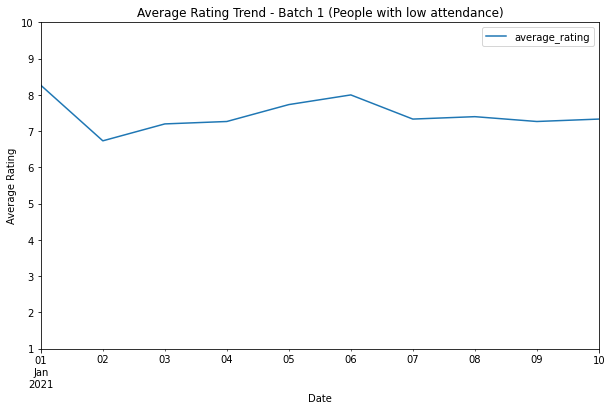

In [224]:
plot_rating_over_time(class1_missers, 'Batch 1 (People with low attendance)')

In [225]:
def date_ratings_highattendance(df_students, full_df):
    students_missing_class = df_students[-15:]
    df = students_missing_class.merge(full_df, left_on = 'student_roll_num',right_on = 'Student Roll Num', how = 'left')
    df_mod = pd.DataFrame(df.drop(['student_roll_num','num_of_classes','classes_attended','average_rating','attendance_perc','Student Roll Num'], axis = 1).mean(axis = 0)).reset_index(drop = False)
    df_mod.columns = ['date','average_rating']
    df_mod['date'] = df_mod['date'].str.replace('R-','')
    df_mod['date'] = pd.to_datetime(df_mod['date'],dayfirst = True)
    return df_mod

In [226]:
class1_highattendance = date_ratings_highattendance(class1_students,class1)

<ipython-input-225-a31aa4187ed1>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mod = pd.DataFrame(df.drop(['student_roll_num','num_of_classes','classes_attended','average_rating','attendance_perc','Student Roll Num'], axis = 1).mean(axis = 0)).reset_index(drop = False)


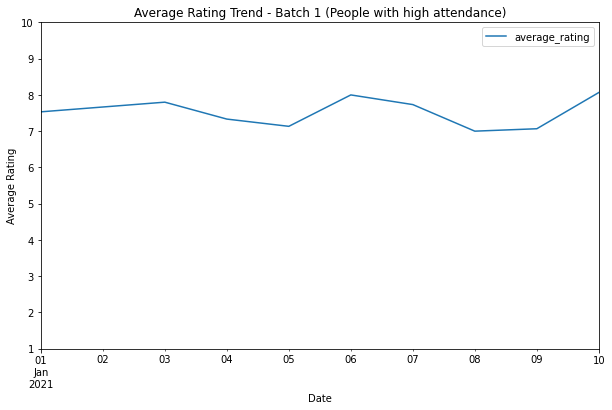

In [227]:
plot_rating_over_time(class1_highattendance, 'Batch 1 (People with high attendance)')

### For Batch 2

<ipython-input-223-e13912435372>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mod = pd.DataFrame(df.drop(['student_roll_num','num_of_classes','classes_attended','average_rating','attendance_perc','Student Roll Num'], axis = 1).mean(axis = 0)).reset_index(drop = False)
<ipython-input-225-a31aa4187ed1>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mod = pd.DataFrame(df.drop(['student_roll_num','num_of_classes','classes_attended','average_rating','attendance_perc','Student Roll Num'], axis = 1).mean(axis = 0)).reset_index(drop = False)


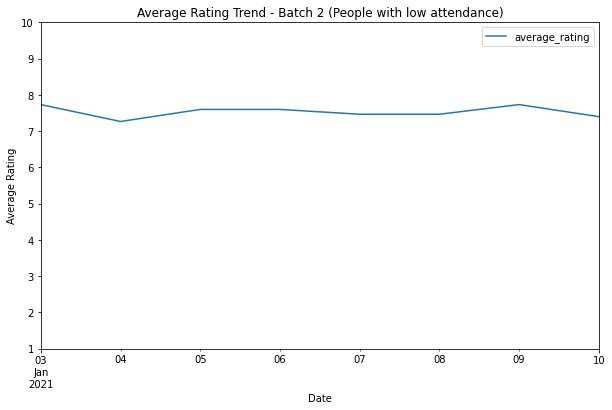

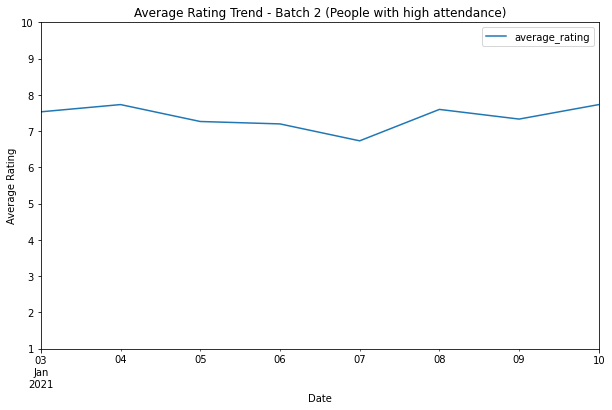

In [228]:
class2_missers = date_ratings_missers(class2_students, class2)
plot_rating_over_time(class2_missers, 'Batch 2 (People with low attendance)')
class2_highattendance = date_ratings_highattendance(class2_students,class2)
plot_rating_over_time(class2_highattendance, 'Batch 2 (People with high attendance)')

In [229]:
# It seems like the average rating for people who miss and are regular is similar, this could mean that the people who shows missed
# may have actually not missed class, but were given attendance incorrectly.